# ***` Logistic Regression `***

***` Import the Iris data which discusses about three species of flowers namely "Setosa","Verisicolor" and "Virginica" Your task is to build a logistic regression model to distinguish between two  of these speicies using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`

`2)Plot impact of logloss for single forecasts (You can import log_loss from sklearn.metrics). Make predictions as 0 to 1 in 0.01 increments. (For example,yhat = [x*0.01 for x in range(0, 101)]).Evaluate predictions for a 0 true value.Plot a graph between y_hat and log_loss`

`3)Find the difference between minimum log loss for label 0 and label 1 [1.5 marks]`

`3)Import the Iris Data, and visualize the data to an idea about it.`

`4)Convert the char labels to numerical as logistic regression takes only 0's and 1's and then create new array of numerical labels.After following the procedure as mentioned in the comments , find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1).[1 marks]`

`5)Split the data in X,y and convert them into arrays`

`6)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`7)Find the weights and bias and save it in a list[5 marks]`

`8)Make a prediction on the test data.Find the accuracy of the prediction.[1 marks]`

`9)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.[1.5 marks]`


In [ ]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
ans = [0]*5

# ***`Importing and Visualizing Data`***



In [ ]:
#Sigmoid Function
#def sigmoid(x):

def sigmoid(x):
        return 1 / (1 + np.exp(-x))

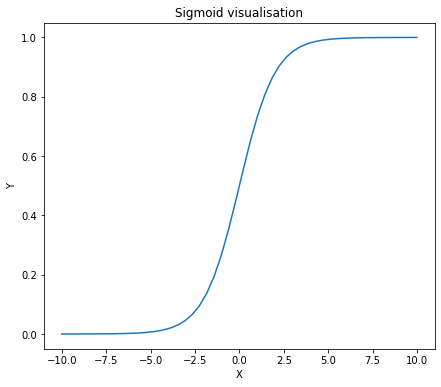

In [ ]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10 
x_val = np.linspace(-10, 10, 50)
#Find y_val, by using sigmoid function
y_val = [sigmoid(x) for x in x_val]
#Plot x_val,y_val and label the graph
plt.figure(figsize = (7 ,6))
plt.plot(x_val, y_val)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sigmoid visualisation')
plt.show()

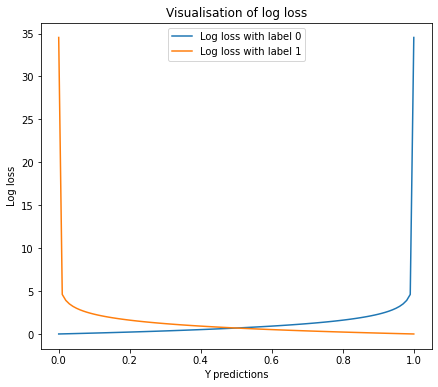

In [ ]:
# Plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
# predictions as 0 to 1 in 0.01 increments
y_preds = [x * 0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
log_loss_0 = [log_loss([0], [y_pred], labels = [0, 1]) for y_pred in y_preds] 
# evaluate predictions for a 1 true value
log_loss_1 = [log_loss([1], [y_pred], labels = [0, 1]) for y_pred in y_preds]
# plot input to loss
plt.figure(figsize = (7, 6))
plt.plot(y_preds, log_loss_0, label = 'Log loss with label 0')
plt.plot(y_preds, log_loss_1, label = 'Log loss with label 1')
plt.legend()
plt.xlabel('Y predictions')
plt.ylabel('Log loss')
plt.title('Visualisation of log loss')
plt.show()

In [ ]:
#Find the difference between minimum log loss for label 0 and label 1 
ans[0]= log_loss([0], [0], labels = [0, 1]) - log_loss([1], [1], labels = [0, 1])

# ***`Processing the Data`***

In [ ]:
#Import the dataset of iris from datasets.load_iris()
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)

In [ ]:
#Look into the top 5 rows of data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


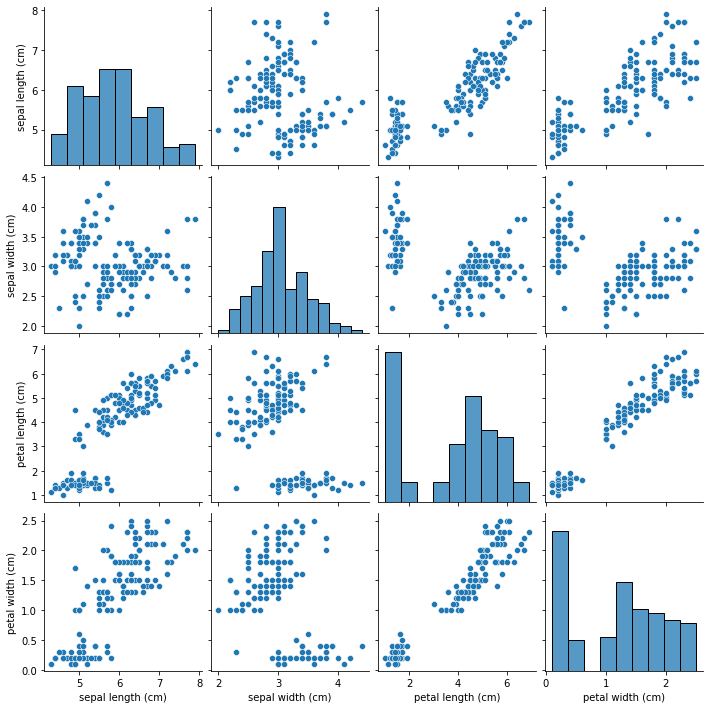

In [ ]:
#Visualize  the data using seaborn pairplot
sns.pairplot(df)
plt.show()

In [ ]:
# Convert char labels into numerical 
#import LabelEncoder which returns array of encoded labels
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
# Create new array of numerical labels
labels = labelencoder.fit_transform(data.target)

In [ ]:
# Drop old labels(char) data 

# Substitute new labels(numerical) into data
df['labels'] = labels

In [ ]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2
# Considering Iris-setosa as "0" and Iris-versicolor as "1"
new_df = df[df['labels'] < 2]

In [ ]:
#Find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1)
ans[1]= np.mean(new_df[new_df['labels'] == 0]['sepal length (cm)']) - np.mean(new_df[new_df['labels'] == 1]['sepal length (cm)'])

# ***`Obtaining Weight Values`***

In [ ]:
# Split the data into X and y
X = new_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = new_df['labels']

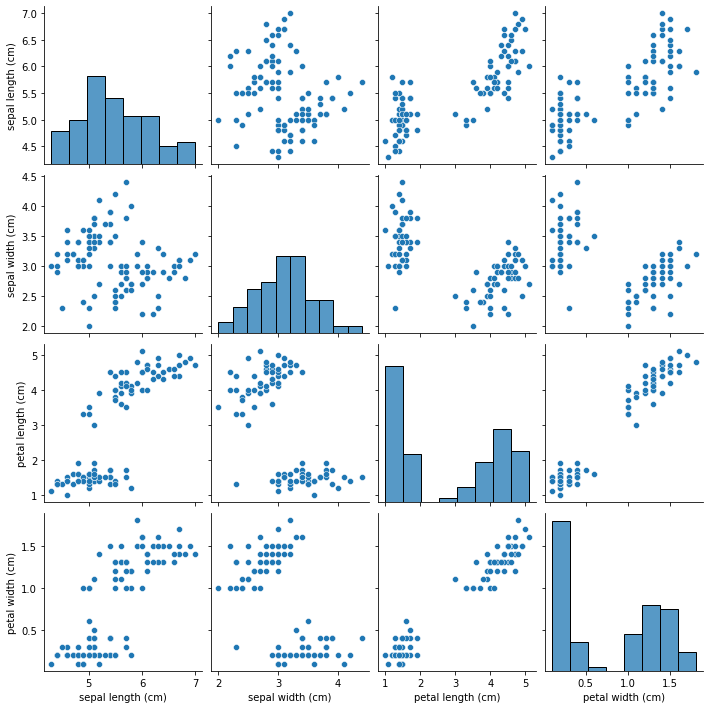

In [ ]:
# Visualize X,y

sns.pairplot(X)
plt.show()

In [ ]:
# Convert X,y into arrays
X = np.array(X)
y = np.array(y)

In [ ]:
#Using sklearn to split the data
from sklearn.model_selection import train_test_split
#Take the test size as 0.2 and random_state as 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Importing Necessary Libraries for Logistic Regression 
from sklearn.linear_model import LogisticRegression 
#Building our model
lr = LogisticRegression()
#Finding the parameter and bias
lr = lr.fit(x_train, y_train)
parameter = lr.coef_
bias = lr.intercept_

In [ ]:
#Printing the parameters and bias
print("The parameters are : ", parameter[0])
print("The bias is : ", bias[0])

The parameters are :  [ 0.45808171 -0.83895654  2.21684247  0.92362595]
The bias is :  -6.5266650038990734


In [ ]:
#Save parameters and bias [w1,w2,w3,w4,b] as one vector 
#i.e if the answer should be in a 1 dimensional list.

list_ = list(parameter[0])
list_.append(bias[0])
ans[2]= list_

In [ ]:
#Predicitng on our test data
y_preds = lr.predict(x_test)

In [ ]:
#Finding the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_preds, y_test)
ans[3]=accuracy

In [ ]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans[4] "Setosa" or "Versicolor"
pred = lr.predict([[4.9, 4, 1.2, 0.4]])

In [ ]:
#The class of the input 

if pred[0] == 0:
        class_ = "Setosa"
else:
        class_ = "Versicolor"

ans[4] = class_

In [ ]:
import json
ans = [str(item) for item in ans]

filename = "ratn.bhosale@gmail.com_Ratnesh_Bhosale_LogisticRegression"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LogisticRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [ ]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)